In [2]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib notebook
import numpy as np

<IPython.core.display.Javascript object>


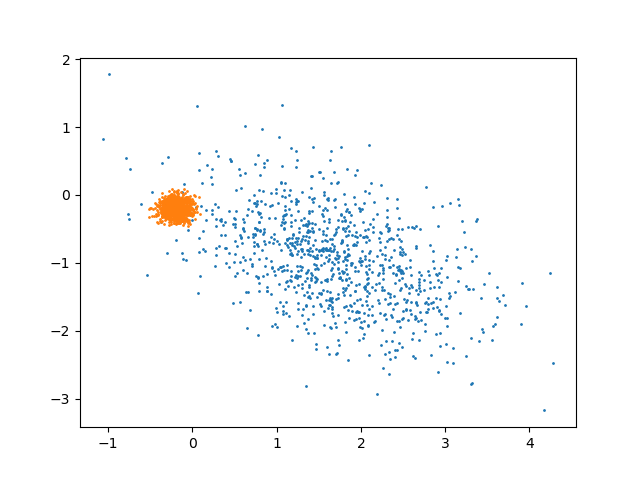

In [3]:
N = 1000
import math
alpha = plt.figure()
rot = np.array([[0.6*math.cos(math.pi/4),-math.sin(math.pi/4)],[math.sin(math.pi/4), 0.1*math.cos(math.pi/4)]])
Xpoints = (1.0 * np.random.randn(N,2) + 1.5 ).dot(rot)

Ypoints = 0.1 * np.random.randn(N,2) - 0.2
YpointsT = Ypoints.T
XpointsT = Xpoints.T
plt.scatter(XpointsT[0], XpointsT[1],  s=1)
plt.scatter(YpointsT[0], YpointsT[1],  s=1)
plt.show()

<IPython.core.display.Javascript object>


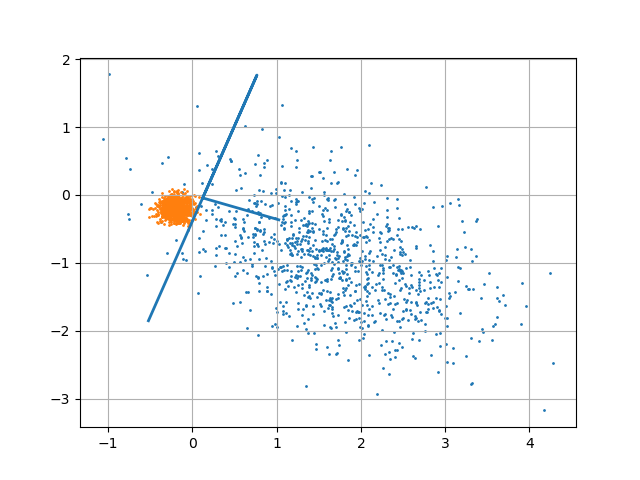

In [33]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(f):
    return f * ( 1 + f )

iters = 10

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

YpointsT = Ypoints.T
XpointsT = Xpoints.T
plt.scatter(XpointsT[0], XpointsT[1],  s=1)
plt.scatter(YpointsT[0], YpointsT[1],  s=1)


line, = ax.plot([], [], lw=2)
ax.grid()

class State:
    def __init__(self):
        self.w = np.array([1.0,1.0])
        self.bias = 0.0
        self.step = 1.0e-2
        self.regstep = 1.0e-3
        
state = State()

def data_gen(t=0):
    cnt = 0
    global state 
    
    while cnt < 1000:
        cnt += 1
        axis = np.array([state.w[1],-state.w[0]])
        center = -state.w * state.bias / state.w.dot(state.w)
        p0 = axis*0.2+ center
        p1 = -axis*0.2 +center
        t += 0.1
        yield t, [p0[0],p1[0],center[0],center[0]+state.w[0]*0.1], [p0[1],p1[1],center[1],center[1]+state.w[1]*0.1]

def init():
    line.set_data([[0,0],[0,0]])
    return line,

def classificationError(val,trueVal):
    binval = 0.0
    if val > 0.5:
        binval = 1.0
    return abs(trueVal - binval)

def iter(method,state):
    errsum = 0.0
    counter = 0.0
    if method == 0:
        for point in Xpoints:
            val = sigmoid(state.w.dot(point) + state.bias)
            err = ( 1.0 - val ) * sigmoid_deriv(val) * 2.0
            state.w += err * state.step * point - state.regstep * state.w
            state.bias += ( err ) * state.step - state.regstep * state.bias
            errsum += classificationError(val,1.0)
            counter += 1.0
            
        for point in Ypoints:
            val = sigmoid(state.w.dot(point) + state.bias)
            err = -val * sigmoid_deriv(val) * 2.0
            state.w += err * state.step * point - state.regstep * state.w
            state.bias += ( err ) * state.step - state.regstep * state.bias
            errsum += classificationError(val,0.0)
            counter += 1.0
    else:
        for point in Xpoints:
            val = sigmoid(state.w.dot(point) + state.bias)
            deriv = sigmoid_deriv(val) / ( val + 1.0e-1 )
            state.w += deriv * state.step * point - state.regstep * state.w
            state.bias += deriv * state.step - state.regstep * state.bias
            errsum += classificationError(val,1.0)
            counter += 1.0
            
        for point in Ypoints:
            val = sigmoid(state.w.dot(point) + state.bias)
            deriv = -sigmoid_deriv(val) / ( 1 - val + 1.0e-1 )
            state.w += deriv * state.step * point - state.regstep * state.w
            state.bias += deriv * state.step - state.regstep * state.bias
            errsum += classificationError(val,0.0)
            counter += 1.0
            
    return errsum / counter




def run(data):
    global state
    iter(1,state)
    ax.figure.canvas.draw()
    
    t, xdata, ydata = data
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)

plt.show()

0.0195


<IPython.core.display.Javascript object>


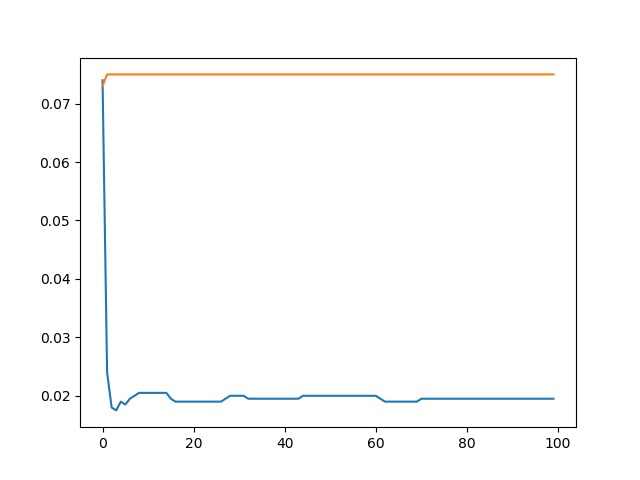

In [32]:
state = State()

iters = 100
error1 = np.zeros((iters))
error2 = np.zeros((iters))


state.step = 1.0e-2
state.regstep = 1.0e-3

for oiter in range(0,iters):
    error2[oiter] = iter(1,state)

    
state = State()
state.step = 1.0e-3
state.regstep = 1.0e-5

for oiter in range(0,iters):
    error1[oiter] = iter(0,state)
    
print(error1[-1])
plt.figure()
plt.plot(error1)
plt.plot(error2)
plt.show()

